<a href="https://colab.research.google.com/github/melvinokta/citradigital/blob/main/QuizPCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

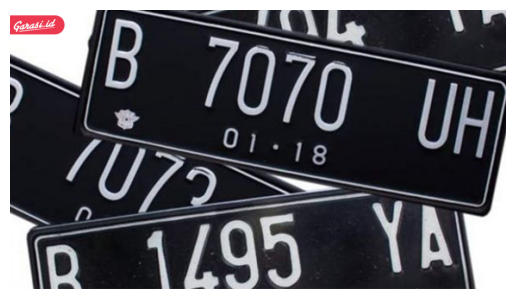

In [18]:
# soal 1
import cv2
from PIL import Image
from google.colab import files
import matplotlib.pyplot as plt

img = cv2.imread('quizpcd.jpeg')
image_cv2 = cv2.imread('quizpcd.jpeg')
image_pil = Image.fromarray(cv2.cvtColor(image_cv2, cv2.COLOR_BGR2RGB))
plt.imshow(image_pil)
plt.axis('off')
plt.show()

Saving quiz pcd.jpeg to quiz pcd (1).jpeg


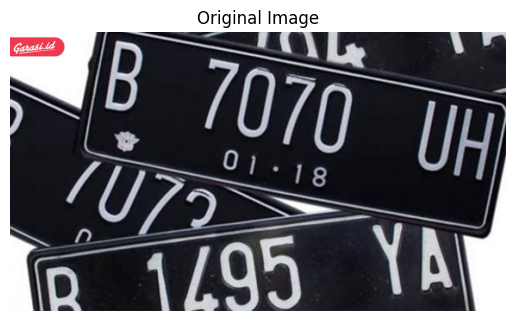

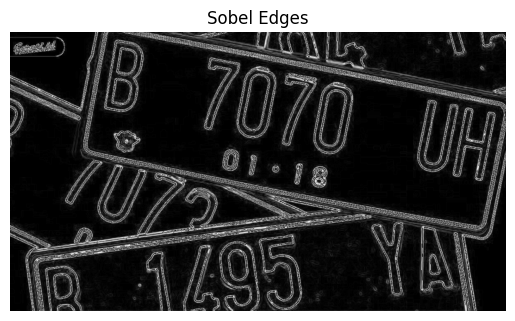

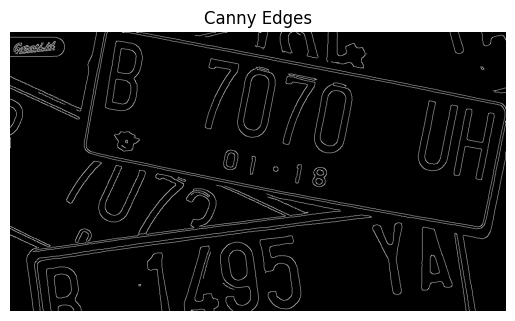

In [29]:
# soal 2
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files

def display_image(image, title='quizpcd.jpeg'):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

def sobel_edge_detection(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
    magnitude = np.sqrt(sobel_x ** 2 + sobel_y ** 2)
    sobel_edges = np.uint8(magnitude)
    return sobel_edges

def canny_edge_detection(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    canny_edges = cv2.Canny(gray_image, 100, 200)
    return canny_edges

uploaded = files.upload()

image_cv2 = cv2.imread(next(iter(uploaded)))

sobel_edges = sobel_edge_detection(image_cv2)

canny_edges = canny_edge_detection(image_cv2)

image_pil = Image.fromarray(cv2.cvtColor(image_cv2, cv2.COLOR_BGR2RGB))

display_image(image_pil, title="Original Image")

display_image(sobel_edges, title="Sobel Edges")

display_image(canny_edges, title="Canny Edges")


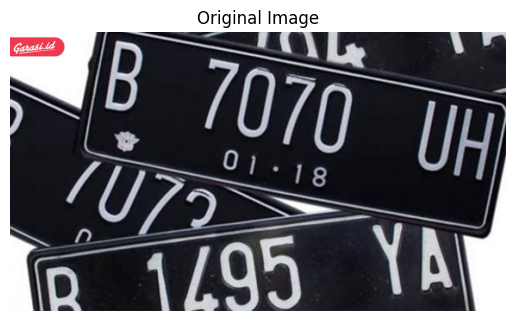

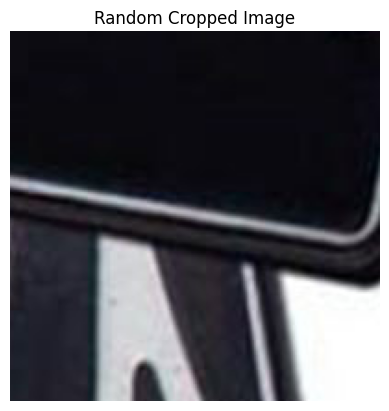

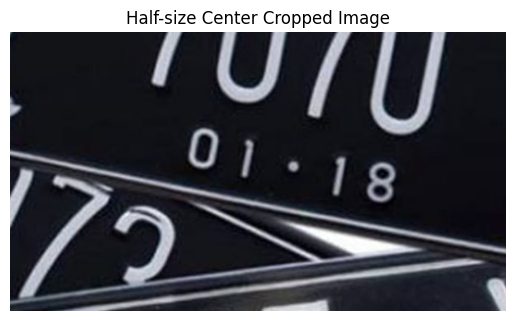

In [42]:
#soal 3
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

def display_image(image, title='Image'):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

image_path = "quizpcd.jpeg"
image_cv2 = cv2.imread(image_path)

display_image(image_cv2, title="Original Image")

def random_crop(image, crop_height, crop_width):
    height, width = image.shape[:2]
    x = random.randint(0, width - crop_width)
    y = random.randint(0, height - crop_height)
    cropped_image = image[y:y+crop_height, x:x+crop_width]
    return cropped_image

def half_size_center_crop(image):
    height, width = image.shape[:2]
    start_row, end_row = height // 4, 3 * height // 4
    start_col, end_col = width // 4, 3 * width // 4
    cropped_image = image[start_row:end_row, start_col:end_col]
    return cropped_image

random_crop_image = random_crop(image_cv2, 200, 200)
display_image(random_crop_image, title="Random Cropped Image")

half_cropped_image = half_size_center_crop(image_cv2)
display_image(half_cropped_image, title="Half-size Center Cropped Image")


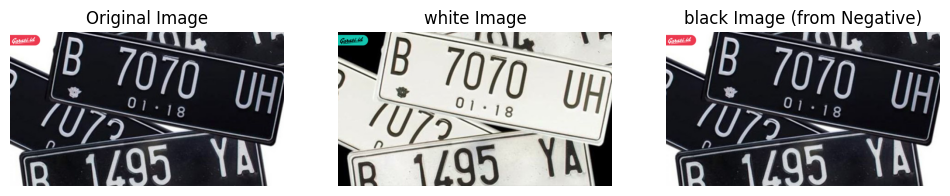

In [57]:
#soal 4
import cv2
import matplotlib.pyplot as plt

image_path = "quizpcd.jpeg"
image = cv2.imread(image_path)

if image is not None:
    negative_image = 255 - image

    original_image = 255 - negative_image

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(negative_image, cv2.COLOR_BGR2RGB))
    plt.title('white Image')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title('black Image (from Negative)')
    plt.axis('off')

    plt.show()
else:
    print("Gagal membaca gambar. Pastikan path gambar benar.")


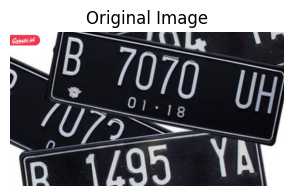

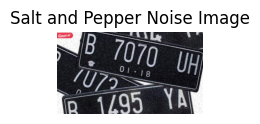

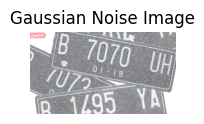

In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_image(image, title='Image'):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

image_path = "quizpcd.jpeg"
image = cv2.imread(image_path)

if image is not None:
    # Tambahkan salt and pepper noise
    def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
        salt_pepper_image = np.copy(image)
        num_salt = np.ceil(salt_prob * image.size)
        coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
        salt_pepper_image[coords[0], coords[1], :] = 255

        num_pepper = np.ceil(pepper_prob * image.size)
        coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
        salt_pepper_image[coords[0], coords[1], :] = 0

        return salt_pepper_image

    salt_pepper_noise_image = add_salt_and_pepper_noise(image, salt_prob=0.01, pepper_prob=0.01)

    def add_gaussian_noise(image, mean=0, std_dev=25):
        gaussian_noise = np.random.normal(mean, std_dev, image.shape).astype(np.uint8)  # Konversi ke uint8
        gaussian_noise_image = cv2.add(image, gaussian_noise)
        return gaussian_noise_image

    gaussian_noise_image = add_gaussian_noise(image)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    display_image(image, title='Original Image')

    plt.subplot(1, 3, 2)
    display_image(salt_pepper_noise_image, title='Salt and Pepper Noise Image')

    plt.subplot(1, 3, 3)
    display_image(gaussian_noise_image, title='Gaussian Noise Image')

    plt.show()
else:
    print("Gagal membaca gambar. Pastikan path gambar benar.")


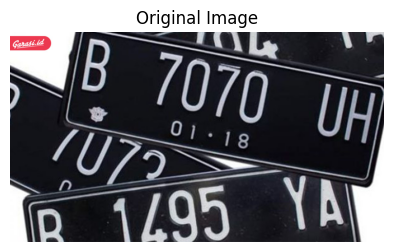

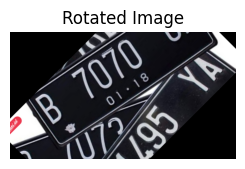

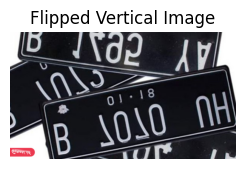

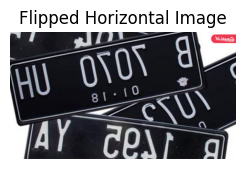

In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_image(image, title='Image'):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

image_path = "quizpcd.jpeg"
image = cv2.imread(image_path)

if image is not None:
    rows, cols = image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), angle=45, scale=1)  # Rotasi 45 derajat
    rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))

    flipped_vertical_image = cv2.flip(image, 0)

    flipped_horizontal_image = cv2.flip(image, 1)

    plt.figure(figsize=(12, 6))

    plt.subplot(2, 2, 1)
    display_image(image, title='Original Image')

    plt.subplot(2, 2, 2)
    display_image(rotated_image, title='Rotated Image')

    plt.subplot(2, 2, 3)
    display_image(flipped_vertical_image, title='Flipped Vertical Image')

    plt.subplot(2, 2, 4)
    display_image(flipped_horizontal_image, title='Flipped Horizontal Image')

    plt.show()
else:
    print("Gagal membaca gambar. Pastikan path gambar benar.")
